<a href="https://colab.research.google.com/github/SoniaRFdz/TFG/blob/main/TFG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098  
Error cuadrático medio en el conjunto de prueba: 0.00985370296984911
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicción: -0.6434178352355957, Valor real: -0.600146044159068
Predicción: 0.15942120552062988, Valor real: 0.2354100300526558
Predicción: -0.2523176670074463, Valor real: -0.2713056669496903
Predicción: -0.4347246289253235, Valor real: -0.42104820605960974
Predicción: -0.48688805103302, Valor real: -0.5002226862459505


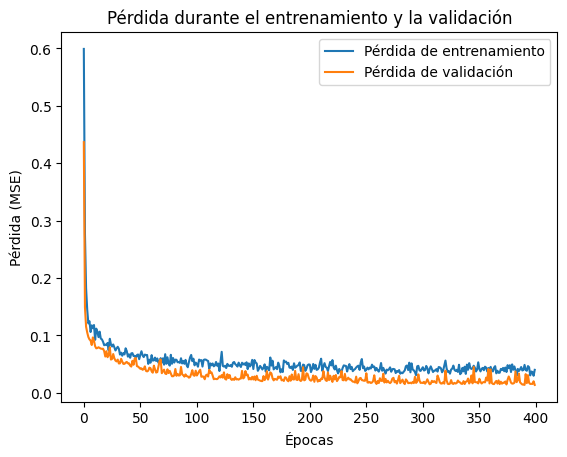

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Cargar los datos desde el archivo CSV
data = pd.read_csv('simulated_pipe_flow_data.csv')

# Dividir los datos en X (características) e y (flujo)
X = data[['Diameter (m)', 'Pressure (Pa)', 'Velocity (m/s)']].values
y = data['Flow (m³/s)'].values

# Normalizar la salida (flujo) para que esté en la misma escala que las características
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1))

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)

# Normalizar las características
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()

# Añadir la capa de entrada explícita
model.add(Input(shape=(3,)))

# Primera capa oculta con regularización L2
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Segunda capa oculta
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Tercera capa oculta con dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Capa de salida
model.add(Dense(1))

# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2, verbose=0)

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Error cuadrático medio en el conjunto de prueba: {loss}")

# Hacer predicciones
predicciones = model.predict(X_test)

# Mostrar algunas predicciones
for i in range(5):
    print(f"Predicción: {predicciones[i][0]}, Valor real: {y_test[i][0]}")

import matplotlib.pyplot as plt

# Graficar el historial de la pérdida (error cuadrático medio)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()


    #SECOND ATTEMPT: SUCCESS, but improvable (mejora de error cuadrático y evolución según épocas de entrenamiento "epochs")
